# KNN

In [16]:
from sklearn.decomposition import PCA
import csv
import random
import math
import operator
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pylab as pl


In [2]:
#read the data
df = pd.read_csv('./data/joinedData.csv', sep=r'\s*(?:\||\#|\,)\s*',
                 engine='python')

#change the classes to numbers
Class = {'LUAD': 0,'BRCA': 1,'KIRC': 2,'PRAD': 3,'COAD': 4} 
df.Class = [Class[item] for item in df.Class] 
df = df.drop('Unnamed: 0',1)
df = df.drop('Unnamed: 0.1',1)
df.head()


,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,3,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,3,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,1,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
df = df[['Class','gene_219', 'gene_220', 'gene_450', 'gene_1858', 'gene_3439',
       'gene_3737', 'gene_3921', 'gene_6733', 'gene_7421', 'gene_7896',
       'gene_7964', 'gene_9175', 'gene_9176', 'gene_13818', 'gene_14114',
       'gene_15895', 'gene_15898', 'gene_16169', 'gene_16392', 'gene_18135']]



In [4]:
#Split the dataframe into X and y, y containing only the class column
X = df.drop('Class', axis=1).values
y = df['Class'].values
y = np.asarray(y)
X

#Standardize data
X = (X - X.mean()) / (X.max() - X.min())


In [5]:
#Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
X_train

array([[ 0.3231313 ,  0.2711247 ,  0.30505566, ...,  0.31563199,
         0.33233632, -0.15995426],
       [-0.11868656, -0.15995426, -0.15995426, ..., -0.15995426,
        -0.08284833, -0.15995426],
       [ 0.39129065,  0.32533128,  0.26868902, ...,  0.42837468,
         0.39384399, -0.15995426],
       ...,
       [-0.15995426, -0.15995426, -0.14398571, ..., -0.15995426,
        -0.15995426, -0.15995426],
       [-0.15995426, -0.15995426, -0.15995426, ..., -0.13019152,
        -0.15995426, -0.15995426],
       [-0.15995426, -0.15995426, -0.13883387, ..., -0.13883387,
        -0.04901804, -0.15995426]])

In [7]:

#using k=n^(1/2) where n = columns, therefore it's 143.2 
K = 143

In [8]:
clf = KNeighborsClassifier(n_neighbors=K, weights='distance')

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=143, p=2,
           weights='distance')

In [10]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9751552795031055


In [11]:
df2 = df.drop('Class',1)
test = df2.iloc[[800]]
test

,gene_219,gene_220,gene_450,gene_1858,gene_3439,gene_3737,gene_3921,gene_6733,gene_7421,gene_7896,gene_7964,gene_9175,gene_9176,gene_13818,gene_14114,gene_15895,gene_15898,gene_16169,gene_16392,gene_18135
800,1.603929,0.0,0.0,0.0,0.0,10.048405,0.0,1.603929,11.746754,3.195174,1.603929,15.605103,16.864488,0.0,0.0,0.0,0.0,1.238665,0.0,8.390233


In [12]:
print ("The test is: ")
print(clf.predict(test))

The test is: 
[3]


In [13]:
print ("The right answer is: ")
check = df.iloc[[800]]
check


The right answer is: 


,Class,gene_219,gene_220,gene_450,gene_1858,gene_3439,gene_3737,gene_3921,gene_6733,gene_7421,...,gene_7964,gene_9175,gene_9176,gene_13818,gene_14114,gene_15895,gene_15898,gene_16169,gene_16392,gene_18135
800,3,1.603929,0.0,0.0,0.0,0.0,10.048405,0.0,1.603929,11.746754,...,1.603929,15.605103,16.864488,0.0,0.0,0.0,0.0,1.238665,0.0,8.390233


In [14]:
pca = PCA(n_components=2).fit(X_train)
pcaX_train = pca.transform(X_train)

In [18]:
h = .02 # step size in the mesh

# the color maps
cmap_light = ListedColormap(['#DDA0DD', '#FFFF00','#40E0D0','#DC143C','#7CFC00'])
clf.fit(pcaX_train, y_train)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = pcaX_train[:,0].min() - 1, pcaX_train[:,0].max() + 1
y_min, y_max = pcaX_train[:,1].min() - 1, pcaX_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])



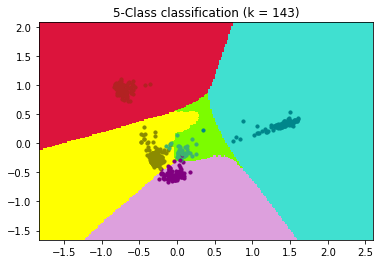

In [19]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

for i in range(0, pcaX_train.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#800080',s=10)
    elif y_train[i] == 1:
        c2 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#8B8B00',s=10)
    elif y_train[i] == 2:
        c3 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#00868B',s=10)
    elif y_train[i] == 3:
        c4 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#B22222',s=10)
    elif y_train[i] == 4:
        c5 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#3CB371',s=10)

# Plot also the training points
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("5-Class classification (k = %i)" % (K))
plt.show()


### References 
#### The code was obtained by using sklearn
#### http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### References in Vancouver
#### 1. sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#### 2. sklearn.decomposition.PCA — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#### 3. KNN (k-nearest neighbors) classification example — scikit-learn 0.11-git documentation [Internet]. Ogrisel.github.io. [cited 4 December 2018]. Available from: http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html
